In [1]:
import torch
import pandas as pd
import random
import seaborn as sns
from compare import getExampleSentencesBySense
import matplotlib.pyplot as plt
import json
from experiment import train_lemma_classifiers_with_vec
from bert import generate_vectorization
from vectrain import *

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,10)})
data_file = "all_lemmas_20-max_layer_0.csv"
df = pd.read_csv(data_file)

In [3]:
df

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp
0,[0],background,0.6594,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,NOUN,NOUN,1000
1,[0],reading,0.5476,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,VERB,NOUN,1000
2,[0],account,0.5700,/dictionary/sense/en_us_NOAD3e_2012/m_en_us121...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us121...,NOUN,NOUN,1000
3,[0],line,0.5643,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,NOUN,NOUN,1000
4,[0],deep,0.5985,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,ADJ,ADJ,1000
5,[0],further,0.5445,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,ADJ,ADV,1000
6,[0],degree,0.5905,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,NOUN,NOUN,1000
7,[0],whole,0.5704,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,ADJ,NOUN,1000
8,[0],movement,0.5574,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,NOUN,NOUN,1000
9,[0],big,0.5802,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,ADJ,ADJ,1000


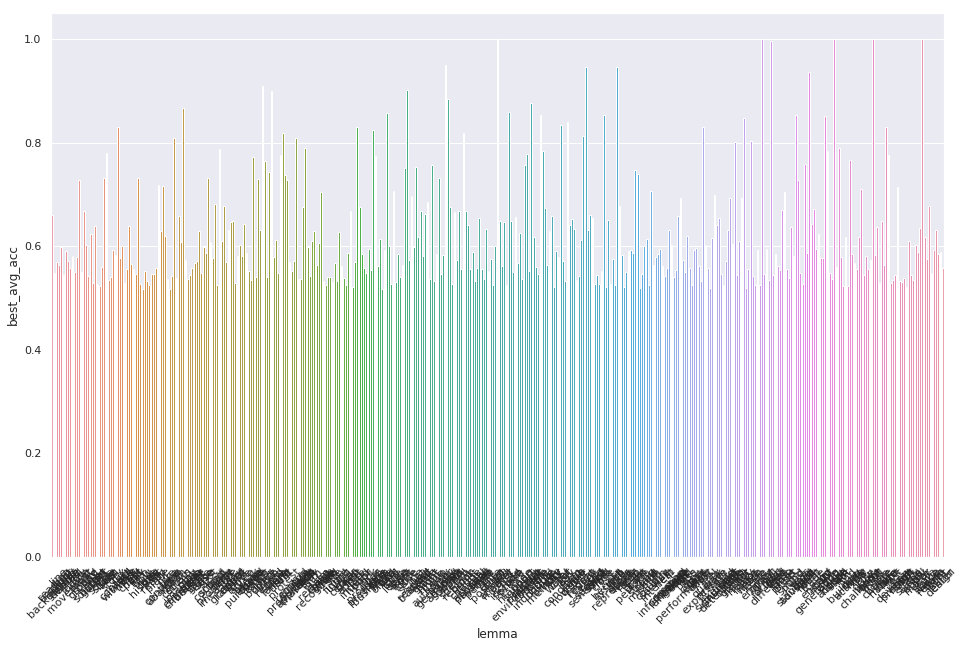

In [4]:
all_lemmas = df
plt.xticks(rotation=45)
all_lemmas_graph = sns.barplot(x="lemma", y="best_avg_acc", data=all_lemmas)

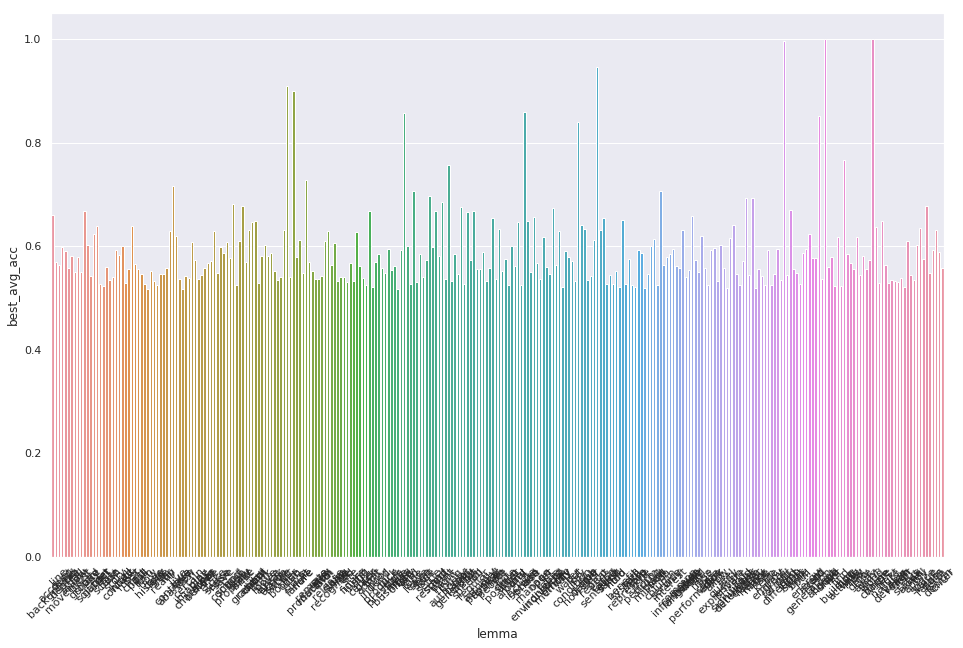

In [5]:
same_pos = df[df["pos1"] == df["pos2"]]
plt.xticks(rotation=45)
same_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=same_pos)

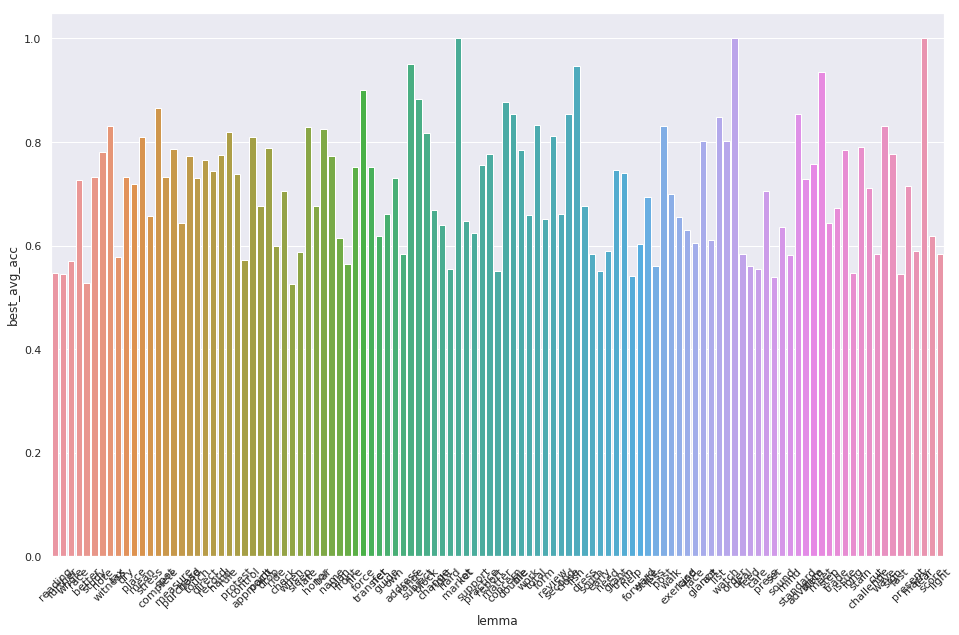

In [6]:
diff_pos = df[df["pos1"] != df["pos2"]]
plt.xticks(rotation=45)
diff_pos_graph = specs = sns.barplot(x="lemma", y="best_avg_acc", data=diff_pos)

In [7]:


with open("data/sense_to_pofs_dict.json") as f:
    sense_pos_dict = json.load(f)
        
def get_pair_type(row):
    sense1_pos = sense_pos_dict[row[3]]
    sense2_pos = sense_pos_dict[row[4]]
    if sense1_pos > sense2_pos:
        sense1_pos, sense2_pos = sense2_pos, sense1_pos
    return sense1_pos, sense2_pos

In [8]:
tmp = df.apply(get_pair_type, axis=1).rename("pos_combo")

df_with_pos_combo = pd.concat([df, tmp], axis=1)
df_with_pos_combo

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp,pos_combo
0,[0],background,0.6594,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,NOUN,NOUN,1000,"(NOUN, NOUN)"
1,[0],reading,0.5476,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,VERB,NOUN,1000,"(NOUN, VERB)"
2,[0],account,0.5700,/dictionary/sense/en_us_NOAD3e_2012/m_en_us121...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us121...,NOUN,NOUN,1000,"(NOUN, NOUN)"
3,[0],line,0.5643,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,NOUN,NOUN,1000,"(NOUN, NOUN)"
4,[0],deep,0.5985,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,ADJ,ADJ,1000,"(ADJ, ADJ)"
5,[0],further,0.5445,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,ADJ,ADV,1000,"(ADJ, ADV)"
6,[0],degree,0.5905,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us123...,NOUN,NOUN,1000,"(NOUN, NOUN)"
7,[0],whole,0.5704,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,ADJ,NOUN,1000,"(ADJ, NOUN)"
8,[0],movement,0.5574,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,NOUN,NOUN,1000,"(NOUN, NOUN)"
9,[0],big,0.5802,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,ADJ,ADJ,1000,"(ADJ, ADJ)"


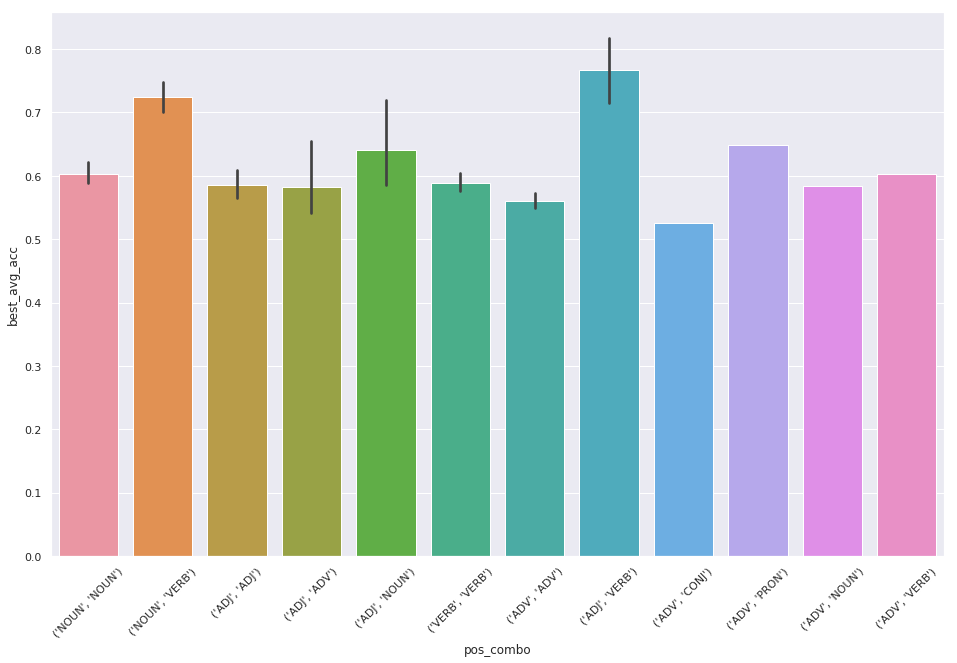

In [9]:
#Note: many of the pos_combos have very few datapoints, in fact several have just one
plt.xticks(rotation=45)
diff_pos_graph = specs = sns.barplot(x="pos_combo", y="best_avg_acc", data=df_with_pos_combo)

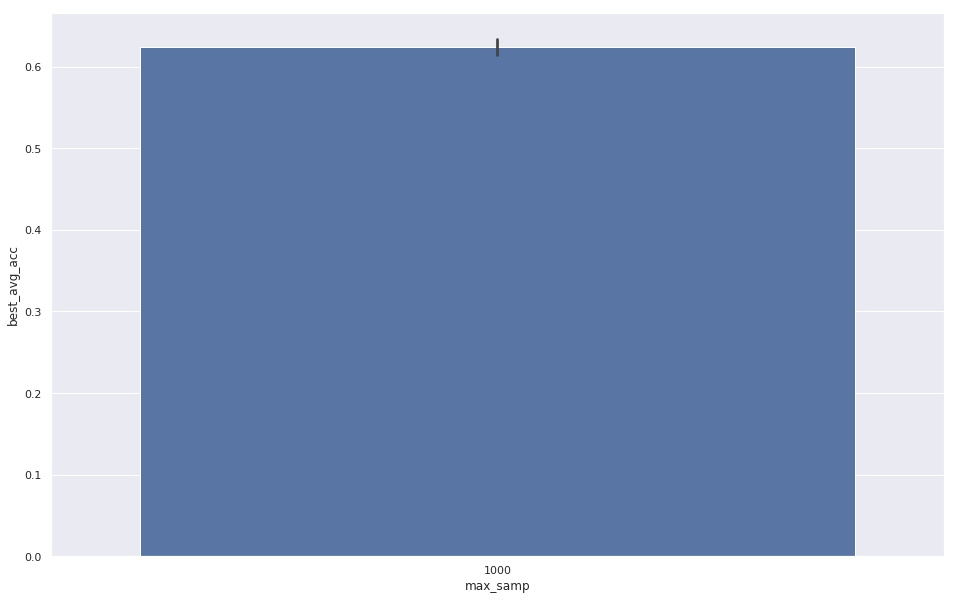

In [10]:
#Warning this is not the proper data. Change this once the data is created.
max_samp_data = df
max_samp_graph = sns.barplot(x="max_samp", y="best_avg_acc", data=max_samp_data)

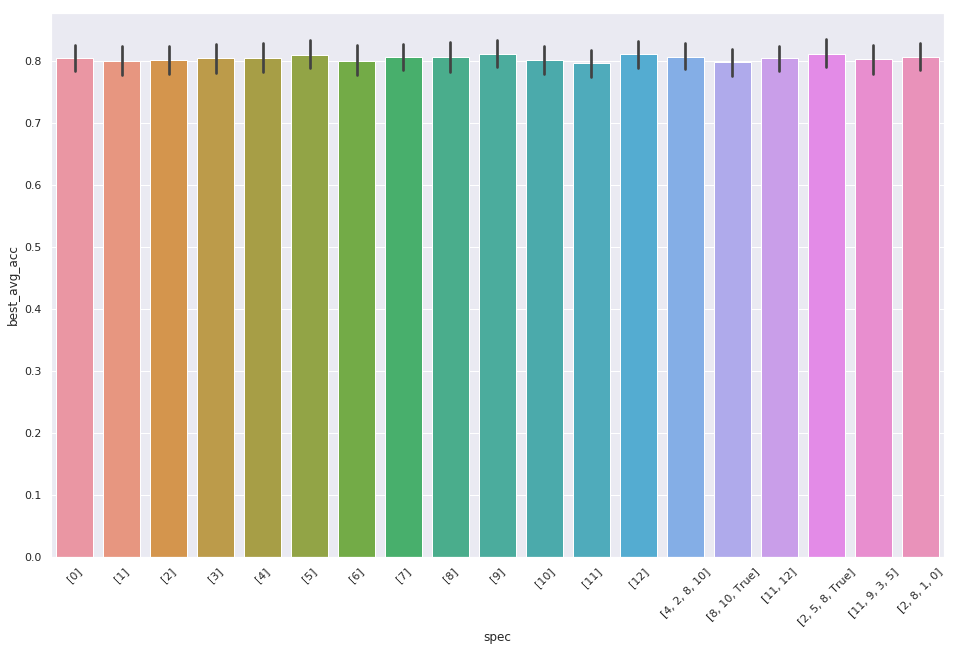

In [11]:
spec_data = pd.read_csv("classifier_data_spec8.csv")

#Note: this is based off of a subset of the words
specs = sns.barplot(x="spec", y="best_avg_acc", data=spec_data)
plt.xticks(rotation=45)
plt.show()